<a href="https://colab.research.google.com/github/uthours/Data-Processing-Visualization/blob/main/Quiz12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SQL Queries
# Dr. Jacob Data Processing Visualization
# Uttam Subedi

Let's import the libraries

In [3]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


Now that I am authenticated, I can start to play around in the dataset.

In [5]:
%%bigquery --project fabled-progress-338823
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`

total_rows
0       32247

There are 32247 rows.

Now, I am using the data from london fire brigade service calls

In [7]:
%%bigquery --project fabled-progress-338823
SELECT *
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`
LIMIT 10

incident_number  ... num_pumps_attending
0  000320-01012017  ...                   2
1  003727-09012017  ...                   2
2  003762-09012017  ...                   2
3  006403-16012017  ...                   2
4  010947-26012017  ...                   1
5  014169-03022017  ...                   5
6  016263-08022017  ...                   2
7  016865-09022017  ...                   1
8  017092-10022017  ...                   1
9  024609-27022017  ...                   1

[10 rows x 32 columns]

I'll need some other packages to navigate to the wikipedia

In [16]:
import requests
import pandas as pa
from bs4 import BeautifulSoup


r = requests.get('https://en.wikipedia.org/wiki/Oklahoma')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
tables = html_soup.find_all('table',class_="wikitable")

df = pa.read_html(str(tables))[0]


df = df.melt(id_vars = ['City','Unnamed: 1'],
                  value_vars = df.columns[2:],
                  var_name = 'month'
)

df.value = df.value.apply(lambda s: int(s[:2]))

df.columns = ['City','Low_High', 'Month','Temp_F']

df

City   Low_High Month  Temp_F
0   Oklahoma City  Avg. high   Jan      50
1   Oklahoma City   Avg. low   Jan      29
2           Tulsa  Avg. high   Jan      48
3           Tulsa   Avg. low   Jan      27
4          Lawton  Avg. high   Jan      50
..            ...        ...   ...     ...
67  Oklahoma City   Avg. low   Dec      31
68          Tulsa  Avg. high   Dec      49
69          Tulsa   Avg. low   Dec      30
70         Lawton  Avg. high   Dec      52
71         Lawton   Avg. low   Dec      30

[72 rows x 4 columns]

In [17]:
df.describe()

Temp_F
count  72.000000
mean   61.333333
std    19.325966
min    26.000000
25%    49.000000
50%    62.000000
75%    73.000000
max    96.000000

I am going to find out the average temperature of Ada, Oklohoma.

In [18]:
df.query('City == "Oklahoma City" and Low_High == "Avg. high"').Temp_F.mean()

72.25

Now, I am going to find the average temperature of all months of the year

In [21]:
df.query('Low_High == "Avg. high"').groupby('Month').agg(['mean','max'])

Temp_F    
            mean max
Month               
April  72.666667  73
Aug    93.666667  95
Dec    50.666667  52
Feb    54.666667  56
Jan    49.333333  50
July   94.333333  96
June   88.666667  90
March  63.333333  65
May    80.333333  82
Nov    61.666667  62
Oct    74.000000  76
Sept   85.000000  86

Let's use the histogram to present low and high temperature in Ada. It doesn't show the exact figure I am trying to show.

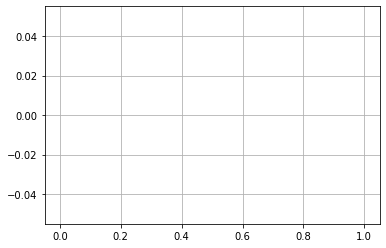

In [19]:
df.query('City == "Ada" and Low_High == "Avg. low"').Temp_F.hist()

Another way to show it

City
Lawton           AxesSubplot(0.125,0.125;0.775x0.755)
Oklahoma City    AxesSubplot(0.125,0.125;0.775x0.755)
Tulsa            AxesSubplot(0.125,0.125;0.775x0.755)
Name: Temp_F, dtype: object

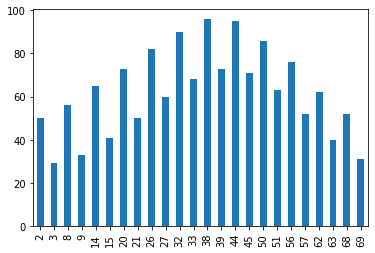

In [20]:
df.groupby('City')['Temp_F'].plot(kind ='bar')